# **Multiple Linear Regression**
## **Bike Sharing Assignment**

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BikeIndia has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.


In such an attempt, **BikeIndia** aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

#### Business Goal:

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.


---

### Data Dictionary
- **instant:** Record index.
- **dteday:** Date in `dd-mm-yyyy` format.
- **season:** Season of the year (1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter).
- **yr:** Year (0 = 2018, 1 = 2019).
- **mnth:** Month of the year (1 = January, ..., 12 = December).
- **holiday:** Indicates whether the day is a holiday (1 = Holiday, 0 = Not a Holiday).
- **weekday:** Day of the week (0 = Sunday, ..., 6 = Saturday).
- **workingday:** Indicates whether the day is a working day (1 = Working Day, 0 = Weekend or Holiday).
- **weathersit:** Weather situation:
  - 1: Clear, Few clouds, Partly cloudy.
  - 2: Mist + Cloudy, Mist + Few clouds.
  - 3: Light Snow, Light Rain, Thunderstorm, Scattered clouds.
  - 4: Heavy Rain, Ice Pellets, Snow, Fog.
- **temp:** Actual temperature in Celsius (normalized in the dataset).
- **atemp:** Perceived or "feeling" temperature in Celsius.
- **hum:** Humidity percentage.
- **windspeed:** Wind speed.
- **casual:** Count of casual users renting bikes.
- **registered:** Count of registered users renting bikes.
- **cnt:** Total count of rentals (sum of `casual` and `registered`).

---


##  Reading and Understanding the Data


In [275]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')


In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [277]:
bike = pd.DataFrame(pd.read_csv("day.csv"))

In [278]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## High-Level Approach


After reviewing the data i want to highlight the approaches that i want to follow for this problemd:

### 1. Data Understanding
- Reviewed the dataset structure, types of variables, and checked for missing values.
- Identified the target variable (`cnt`) and potential independent variables.

### 2. Data Cleaning and Preprocessing
- Dropped unnecessary columns such as `instant`.
- Converted the `dteday` column into a datetime format for feature extraction.
- Removed `casual` and `registered` to avoid data leakage as they sum up to `cnt`.

### 3. Feature Engineering

- Checked for highly correlated features like `temp` and `atemp` to avoid redundancy.
- Encoded categorical variables such as `season` and `weathersit` using one-hot encoding.

### 4. Exploratory Data Analysis (EDA)
- Analyzed distributions of variables and visualized their relationships with the target variable.
- Examine correlations to understand significant predictors and potential multicollinearity.

### 5. Model Building
- Split the data into training and testing sets.
- Built a multiple linear regression model to predict bike demand (`cnt`).
- Evaluated the model using metrics such as R-squared, Adjusted R-squared, and RMSE.

### 6. Model Refinement
- Iteratively removed insignificant predictors based on p-values.
- Tested transformations and interactions for non-linear relationships.

### 7. Insights and Recommendations
- Interpreted the model coefficients to provide actionable business insights.
- Suggested strategies to optimize bike-sharing operations based on the analysis.


In [280]:
# Check the descriptive information
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [281]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Overview and Initial Inferences

### Dataset Summary
The dataset contains **730 entries** and **16 columns**, with no missing values. It includes a mix of categorical and numerical variables, as well as the target variable `cnt` (total bike rentals). Below is a summary of the dataset:

1. **Structure:**
   - **Total Rows:** 730
   - **Total Columns:** 16
   - **Data Types:** 11 integers, 4 floats, 1 object (date column)
   - **No Missing Values:** The dataset is complete and ready for preprocessing.

2. **Key Features:**
   - **`instant`:** Record index (not a predictive feature, can be dropped).
   - **`casual` an `registered`:** Breakdown of bike rentals; these s um up to `cnt`.
   - **`temp` and `atemp`:** Temperature-related features (likely correlated).
   - **`weathersit`:** Weather condition categories (1 = Clear, 2 = Mist, etc.).
   - **`season`:** Encodes seasons (1 = Spring, 2 = Summer, etc.).

---

### Statistical Insights

#### 1. **Target Variable (`cnt` - Total Rentals):**
- **Mean Demand:** **4508** rentals per day.
- **Range:** **22 (min)** to **8714 (max)**, indicating a wide variation in daily demand.
- **Standard Deviation:** **1936**, suggesting significant variability.
- The high variance indicates that external factors like season, weather, or working day might influence bike rentals.

#### 2. **Temperature Features (`temp` and `atemp`):**
- `temp` ranges from **2.42°C to 35.32°C**, while `atemp` (perceived temperature) ranges from **3.95°C to 42.04°C**.
- Likely to exhibit multicollinearity; one feature might be redundant after correlation analysis.

#### 3. **Humidity (`hum`) and Windspeed (`windspeed`):**
- **Humidity:** Mean of **62.76%**, ranging up to **97.25%**.
- **Windspeed:** Mean of **12.76**, with a maximum of **34.00**, suggesting that high winds might impact bike rentals.

#### 4. **Categorical Features:**
- **`season`:** Four categories (1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter).
- **`yr`:** Binary year indicator (0 = 2018, 1 = 2019).
- **`mnth`:** 12 categories representing months.
- **`holiday` and `workingday`:** Temporal variables capturing holidays and workdays.
- **`weathersit`:** Encodes weather conditions, with categories ranging from clear to severe conditions.

#### 5. **Bike Rental Breakdown (`casual` and `registered`):**
- **Casual Users:** Mean of **849 rentals per day**, indicating irregular users.
- **Registered Users:** Mean of **3658 rentals per day**, showing more consistent demand.
- Registered users contribute significantly more to total rentals than casual users.

---

### Initial Observations
- **Completeness:** No missing values in the dataset.
- **Temporal Features:** Columns like  `weekday`, and `workingday` are essential for extracting temporal trends.
- **Feature Redundancy:** Potential multicollinearity between `temp` and `atemp` should be addressed through correlation analysis.
- **Target Variability:** Wide range in `cnt` suggests that external factors like weather and seasonality play a significant role in bike rentals.
- **Key Predictors:** Features like `season`, `weathersit`, `workingday`, and `temp` are likely critical drivers of demand.




## Conversion and Encoding of Categorical Variables
Certain columns ( `season` , `weathersit` ) in the dataset use numeric values to represent categories. However, these numbers do not convey any inherent order, so treating them as numeric values could mislead the model. To make the data more interpretable and prepare it for machine learning, we convert these numeric codes into their actual string labels based on the data dictionary. After this, encoding will be applied to transform the categorical data into a format suitable for the model.
.


In [284]:
# Mapping dictionaries based on the data dictionary
season_mapping = {1: "spring", 2: "summer", 3: "fall", 4: "winter"}

weathersit_mapping = {
    1: "Clear/Few clouds/Partly cloudy",
    2: "Mist + Cloudy",
    3: "Light Snow/Light Rain + Thunderstorm",
    4: "Heavy Rain/Snow + Fog"
}

# Converting numeric values to string labels
bike["season"] = bike["season"].map(season_mapping)
bike["weathersit"] = bike["weathersit"].map(weathersit_mapping)

# Verify the conversion
print("Unique values after conversion:")
print("Season:", bike["season"].unique())
print("Weather Situation:", bike["weathersit"].unique())



Unique values after conversion:
Season: ['spring' 'summer' 'fall' 'winter']
Weather Situation: ['Mist + Cloudy' 'Clear/Few clouds/Partly cloudy'
 'Light Snow/Light Rain + Thunderstorm']


In [285]:
bike = pd.get_dummies(bike, columns=['season', 'weathersit'], dtype=int, drop_first=True)


### Interpretation of Encoded Categorical Features
. Below is the interpretation of the encoded values for each column:

---

### 1. `season` (Seasons of the year)
Encoded as:
- `000` → Spring
- `001` → Summer
- `010` → Fall
- `011` → Winter

---

### 2. `weathersit` (Weather situations)
Encoded as:
- `00` → Clear, Few clouds, Partly cloudy
- `01` → Mist + Cloudy, Mist + Few clouds
- `10` → Light Snow, Light Rain, Thunderstorm, Scatchine learning models.


In [287]:
bike.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,weathersit_Light Snow/Light Rain + Thunderstorm,weathersit_Mist + Cloudy
0,1,01-01-2018,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1
1,2,02-01-2018,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1
2,3,03-01-2018,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0
3,4,04-01-2018,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0
4,5,05-01-2018,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0


In [288]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 19 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   instant                                          730 non-null    int64  
 1   dteday                                           730 non-null    object 
 2   yr                                               730 non-null    int64  
 3   mnth                                             730 non-null    int64  
 4   holiday                                          730 non-null    int64  
 5   weekday                                          730 non-null    int64  
 6   workingday                                       730 non-null    int64  
 7   temp                                             730 non-null    float64
 8   atemp                                            730 non-null    float64
 9   hum                             

## Dropping the columns which are not required:
The following columns were dropped to simplify the dataset and avoid redundancy:
- `instant`, `mnth`, `dteday`, and `weekday`: These columns were dropped as they either represent irrelevant information (timestamps, categorical features) or are encoded in a more usable format.
- `casual` and `registered`: These columns were dropped as the target variable `cnt` already captures the total number of rentals, which is the sum of `casual` and `registered`. Dropping them prevents redundancy and potential multicollinearity.


In [290]:
bike.drop(['instant','mnth','dteday','weekday','casual','registered'],axis=1, inplace=True)

In [291]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   yr                                               730 non-null    int64  
 1   holiday                                          730 non-null    int64  
 2   workingday                                       730 non-null    int64  
 3   temp                                             730 non-null    float64
 4   atemp                                            730 non-null    float64
 5   hum                                              730 non-null    float64
 6   windspeed                                        730 non-null    float64
 7   cnt                                              730 non-null    int64  
 8   season_spring                                    730 non-null    int32  
 9   season_summer                   

## Exploring the data

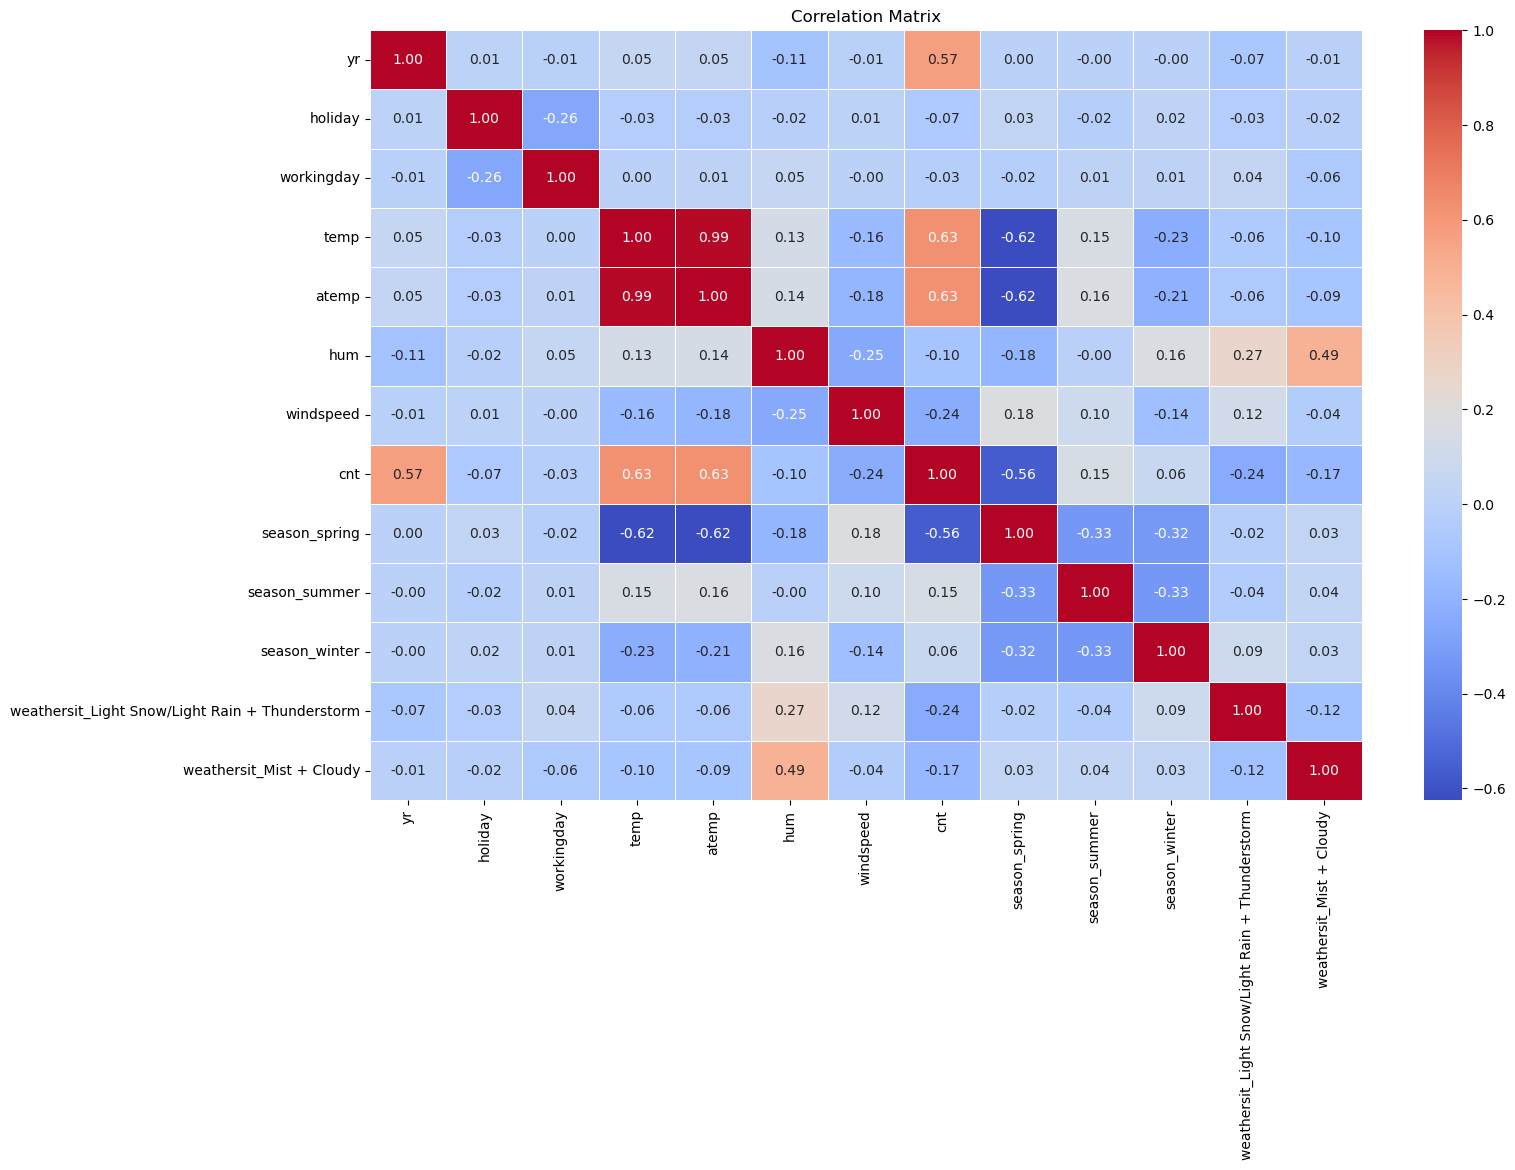

In [293]:
corr =bike.corr()
plt.figure(figsize=(16,10))
# Generate a heatmap
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [294]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   yr                                               730 non-null    int64  
 1   holiday                                          730 non-null    int64  
 2   workingday                                       730 non-null    int64  
 3   temp                                             730 non-null    float64
 4   atemp                                            730 non-null    float64
 5   hum                                              730 non-null    float64
 6   windspeed                                        730 non-null    float64
 7   cnt                                              730 non-null    int64  
 8   season_spring                                    730 non-null    int32  
 9   season_summer                   

### Droping the highly correated column
- column `temp` and `atemp` indicates high correlation hence am dropping the `temp` column

In [296]:
bike.drop('temp',axis=1,inplace=True)

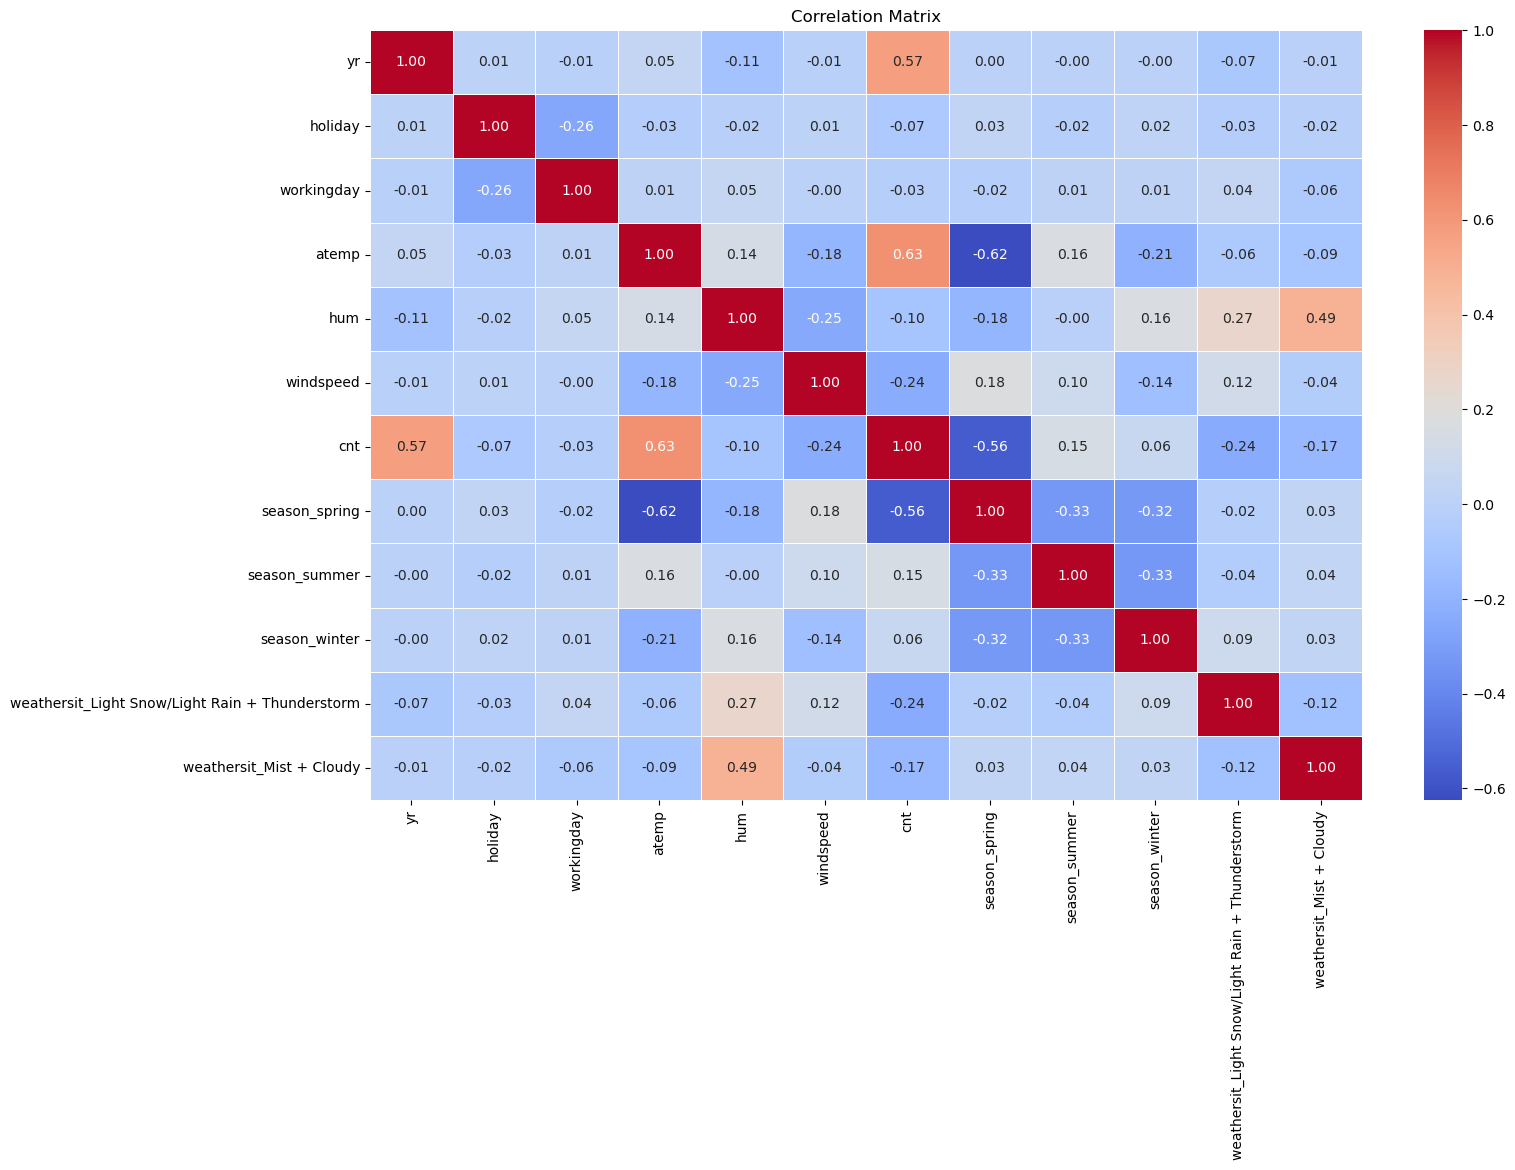

In [297]:
corr =bike.corr()
plt.figure(figsize=(16,10))
# Generate a heatmap
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## Data Preparation for model

In [299]:
bike_train, bike_test = train_test_split(bike,train_size=0.7,test_size=0.3,random_state=55)

### Rescaling the dataset

#### **Why Rescale Features with MinMaxScaler?**

Rescaling features in multiple linear regression using MinMaxScaler is crucial for:

* **Equalizing Feature Influence:** Prevents features with larger values from dominating the model.
* **Improving Model Convergence:** Helps gradient-based optimization algorithms converge faster.
* **Enhancing Interpretability:** Makes the coefficients of the regression model more comparable.

**MinMaxScaler:**

I have used MinMaxScaler to transform features to a specific range (0-1):

In [301]:
scaler = MinMaxScaler()

In [302]:
num_vars=['atemp','hum','windspeed','cnt']
bike_train[num_vars]=scaler.fit_transform(bike_train[num_vars])

In [303]:
bike_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Light Snow/Light Rain + Thunderstorm,weathersit_Mist + Cloudy
660,1,0,1,0.592306,0.579872,0.148749,0.872378,0,0,1,0,0
109,0,0,1,0.637051,0.544728,0.452579,0.459627,0,1,0,0,0
20,0,0,0,0.103388,0.343982,0.682065,0.178249,1,0,0,0,0
380,1,1,0,0.146481,0.427582,0.430795,0.266729,1,0,0,0,0
583,1,0,1,0.811932,0.659212,0.194850,0.849760,0,0,0,0,1


In [304]:
# splitting the data in to X_train and y_train data sets for model

X_train=bike_train.drop('cnt',axis=1)
y_train=bike_train['cnt']


### Feature selection using RFE

#### Why Use RFE for Feature Selection?

RFE (Recursive Feature Elimination) is a feature selection method used to select the most important features for a machine learning model. It works by recursively removing the least important features until the desired number of features is reached.

**Benefits of using RFE:**

* **Improved Model Accuracy:** By selecting only the most relevant features, RFE can help to improve the accuracy of the model by reducing noise and overfitting.
* **Reduced Model Complexity:** RFE simplifies the model by reducing the number of features, making it easier to interpret and understand.
* **Faster Training Time:** With fewer features, the model can be trained faster.

Am going to use RFE to select 10 features and from there i will review the features and start eliminating the manually until there no multi colineary and acceptable model accuracy


In [306]:
lm= LinearRegression()

In [307]:
# Perform RFE
rfe = RFE(lm, n_features_to_select=10)  # Adjust `n_features_to_select` as needed
rfe = rfe.fit(X_train, y_train)
# Get the selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter',
       'weathersit_Light Snow/Light Rain + Thunderstorm',
       'weathersit_Mist + Cloudy'],
      dtype='object')


In [308]:
# Subset X_train to include only the selected features
X_train_rfe = X_train[selected_features]
# Add constant for statsmodels OLS
X_train_rfe = sm.add_constant(X_train_rfe)
# Train the final OLS model with selected features
ols_model = sm.OLS(y_train, X_train_rfe).fit()

In [309]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.3
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          1.53e-186
Time:                        10:59:33   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                               0.3055      0.033      9.306      0.000       0.241       0.370
yr                                                  0.2367      0.008     28.324      0.000       0.220       0.253
holiday                                            -0.1002      0.025     -3.976      0.000      -0.150      -0.051
atemp                                               0.4762      0.034     13.896      0.000       0.409       0.543
hum                                                -0.1137      0.034     -3.389      0.001      -0.180      -0.048
windspeed                                          -0.1318      0.028     -4.712      0.000      -0.187      -0.077
season_spring                                      -0.1200      0.020     -6.124      0.000      -0.159      -0.082
season_summer                                       0.0292      0.013      2.226      0.026       0.003       0.055
season_winter                                       0.0656      0.016      4.084      0.000       0.034       0.097
weathersit_Light Snow/Light Rain + Thunderstorm    -0.2643      0.031     -8.608      0.000      -0.325      -0.204
weathersit_Mist + Cloudy                           -0.0462      0.011     -4.118      0.000      -0.068      -0.024
==============================================================================
Omnibus:                       59.920   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.729
Skew:                          -0.589   Prob(JB):                     9.26e-35
Kurtosis:                       5.447   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [310]:
# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

In [311]:
# Exclude the constant term when calculating VIF
X_train_no_const = X_train_rfe.drop('const', axis=1)

In [312]:
# Calculate VIF
vif_results = calculate_vif(X_train_no_const)
print(vif_results)

                                           Feature        VIF
0                                               yr   2.125214
1                                          holiday   1.035249
2                                            atemp  11.617416
3                                              hum  18.348493
4                                        windspeed   5.557078
5                                    season_spring   3.239189
6                                    season_summer   2.230846
7                                    season_winter   2.403531
8  weathersit_Light Snow/Light Rain + Thunderstorm   1.380305
9                         weathersit_Mist + Cloudy   2.487214


### Drop **`hum`** column

though the p value is in acceptable range VIF of **`hum`** is extreamly high hence am dropping hum column 

In [314]:
X_train_rfe.drop('hum',axis=1,inplace=True)

In [315]:
# Add constant for statsmodels OLS
X_train_rfe = sm.add_constant(X_train_rfe)

# Train the final OLS model with selected features
ols_model_1 = sm.OLS(y_train, X_train_rfe).fit()

In [316]:
ols_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     269.0
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          2.61e-185
Time:                        10:59:33   Log-Likelihood:                 489.03
No. Observations:                 510   AIC:                            -958.1
Df Residuals:                     500   BIC:                            -915.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                               0.2539      0.029      8.641      0.000       0.196       0.312
yr                                                  0.2410      0.008     28.873      0.000       0.225       0.257
holiday                                            -0.1021      0.025     -4.010      0.000      -0.152      -0.052
atemp                                               0.4524      0.034     13.349      0.000       0.386       0.519
windspeed                                          -0.1009      0.027     -3.775      0.000      -0.153      -0.048
season_spring                                      -0.1243      0.020     -6.290      0.000      -0.163      -0.085
season_summer                                       0.0252      0.013      1.911      0.057      -0.001       0.051
season_winter                                       0.0577      0.016      3.593      0.000       0.026       0.089
weathersit_Light Snow/Light Rain + Thunderstorm    -0.3153      0.027    -11.664      0.000      -0.368      -0.262
weathersit_Mist + Cloudy                           -0.0696      0.009     -7.805      0.000      -0.087      -0.052
==============================================================================
Omnibus:                       54.093   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.796
Skew:                          -0.577   Prob(JB):                     2.16e-27
Kurtosis:                       5.108   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [317]:
# Exclude the constant term when calculating VIF
X_train_no_const = X_train_rfe.drop('const', axis=1)

In [318]:
# Calculate VIF
vif_results = calculate_vif(X_train_no_const)
print(vif_results)

                                           Feature       VIF
0                                               yr  2.107909
1                                          holiday  1.034598
2                                            atemp  4.123535
3                                        windspeed  5.430958
4                                    season_spring  2.140998
5                                    season_summer  1.947591
6                                    season_winter  1.618830
7  weathersit_Light Snow/Light Rain + Thunderstorm  1.078440
8                         weathersit_Mist + Cloudy  1.520651


In [319]:
y_train_pred= ols_model_1.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

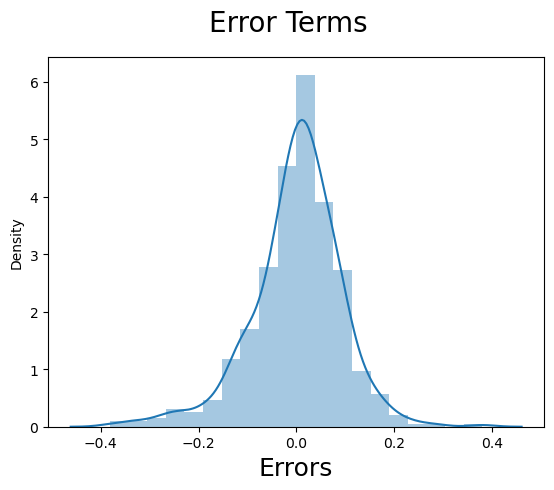

In [320]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

In [321]:
num_vars=['atemp','hum','windspeed','cnt']

bike_test[num_vars]=scaler.fit_transform(bike_test[num_vars])

In [322]:
bike_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Light Snow/Light Rain + Thunderstorm,weathersit_Mist + Cloudy
314,0,1,0,0.273676,0.458869,0.746136,0.354582,0,0,1,0,0
572,1,0,0,0.921554,0.611396,0.303220,0.781480,0,0,0,0,0
404,1,0,0,0.205722,0.577977,0.415659,0.410359,1,0,0,0,0
287,0,0,1,0.564582,0.497001,0.591107,0.577810,0,0,1,0,0
181,0,0,0,0.797170,0.407455,0.165197,0.595316,0,0,0,0,0


In [323]:
X_test=bike_test.drop('cnt',axis=1)

y_test=bike_test['cnt']

Final_columns=['yr','holiday','atemp','windspeed','season_spring','season_summer','season_winter','weathersit_Light Snow/Light Rain + Thunderstorm','weathersit_Mist + Cloudy']  


In [324]:

X_test_rfe=sm.add_constant(X_test[Final_columns])

In [325]:
y_test_pred= ols_model_1.predict(X_test_rfe)

Text(0, 0.5, 'y_pred')

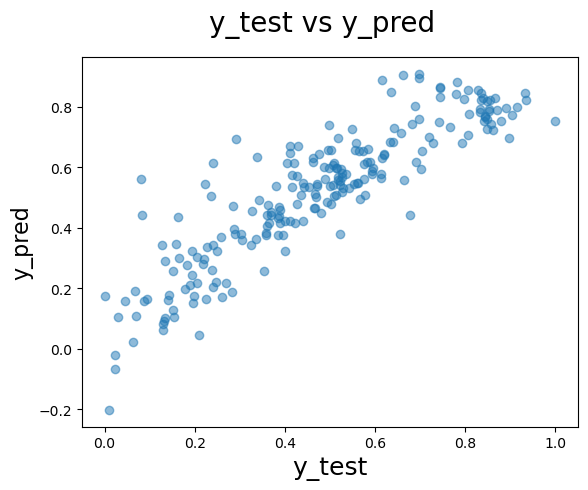

In [326]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred,alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

In [327]:
# Calculate R²
r2 = r2_score(y_test, y_test_pred)

In [328]:
# Get the number of observations and predictors
n = len(y_test)  # Number of observations
p = X_test_rfe.shape[1]  # Number of predictors (from the test set)

# Calculate Adjusted R²
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print(f"R²: {r2}")
print(f"Adjusted R²: {adjusted_r2}")

R²: 0.7473599658793242
Adjusted R²: 0.7352138103927532


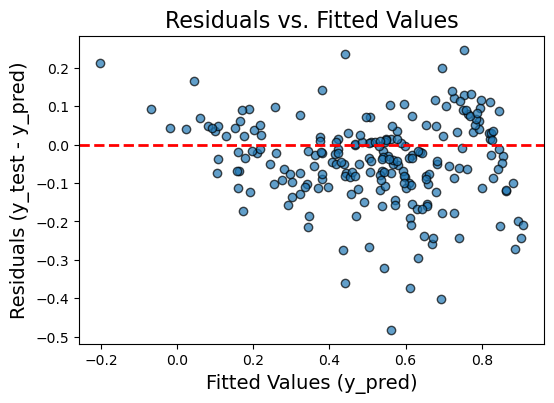

In [329]:
# Calculate residuals
residuals = y_test - y_test_pred

# Residuals vs. Fitted Values Plot
plt.figure(figsize=(6, 4))
plt.scatter(y_test_pred, residuals, alpha=0.7, edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs. Fitted Values', fontsize=16)
plt.xlabel('Fitted Values (y_pred)', fontsize=14)
plt.ylabel('Residuals (y_test - y_pred)', fontsize=14)
plt.show()


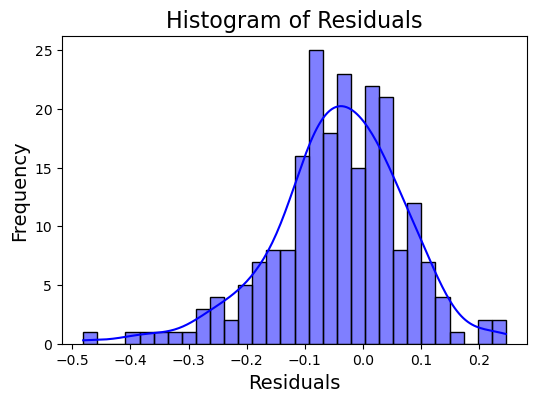

In [330]:
# Histogram of Residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Histogram of Residuals', fontsize=16)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

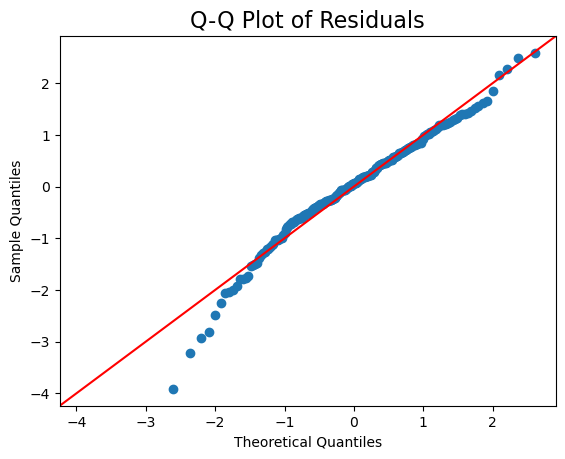

In [331]:
# Q-Q Plot
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals', fontsize=16)
plt.show()

### Final Conclusion for Bike Sharing Demand Prediction

#### Business Context:
BikeIndia, a US bike-sharing provider, aims to recover from revenue losses caused by the COVID-19 pandemic by understanding the factors influencing bike demand. The goal is to prepare for post-pandemic market conditions and optimize business strategies to meet customer demand and maximize profits.

#### Model Performance:
1. **Train Data**:
   - **R-squared**: 0.828 (82.8% of the variance in bike demand (`cnt`) is explained by the model).
   - **Adjusted R-squared**: 0.825 (adjusted for the number of predictors, the model explains 82.5% of the variance).
   - **F-statistic**: 300.6 (p-value = 8.93e-186), indicating the model is statistically significant.
   - All predictors are statistically significant (p-values < 0.05), with `yr` (year) and `atemp` (feeling temperature) having the strongest positive impact on bike demand.

2. **Test Data**:
   - **R-squared**: 0.746 (74.6% of the variance in bike demand is explained on the test data).
   - **Adjusted R-squared**: 0.735 (adjusted for the number of predictors, the model explains 73.5% of the variance).
   - The model generalizes well to unseen data, though there is a slight drop in performance compared to the training data, which is expected.

---

#### Residual Analysis:
1. **Residuals vs. Fitted Values Plot**:
   - The residuals are randomly scattered around zero, indicating no clear pattern or heteroscedasticity. This suggests that the linearity assumption is satisfied.

2. **Q-Q Plot of Residuals**:
   - The residuals deviate from the theoretical quantiles at the tails, indicating non-normality. This is consistent with the high **Jarque-Bera** and **Omnibus** test results from the model summary.

3. **Histogram of Residuals**:
   - The residuals are slightly left-skewed and have heavier tails than a normal distribution, which aligns with the **Skew** (-0.601) and **Kurtosis** (5.092) values.

---

#### Key Observations:
- The model performs well on both training and test data, with high R-squared values and statistically significant predictors.
- Residual diagnostics indicate that the linearity assumption is satisfied, but the residuals are not perfectly normally distributed. This is common in real-world datasets and may not severely impact the model's predictive power.
- The drop in R-squared from training to test data (0.828 to 0.746) suggests slight overfitting, but the model still generalizes reasonably well.

---

#### Significant Predictors of Bike Demand:
1. **Positive Impact**:
   - `yr` (Year): Bike demand increases over time, indicating a growing trend in bike-sharing usage.
   - `atemp` (Feeling Temperature): Higher perceived temperatures lead to increased bike rentals.
   - `season_winter`: Winter season shows a slight positive impact on bike demand compared to spring.

2. **Negative Impact**:
   - `holiday`: Bike demand decreases on holidays.
   - `windspeed`: Higher wind speeds reduce bike rentals.
   - `season_spring`: Spring season has a negative impact on bike demand compared to other seasons.
   - `weathersit`: Adverse weather conditions (e.g., Light Snow, Light Rain, Thunderstorm) significantly reduce bike demand.

---

#### Recommendations for BikeIndia:
1. **Business Strategy**:
   - Focus on marketing and promotions during favorable weather conditions (e.g., clear skies, moderate temperatures) to maximize bike rentals.
   - Offer incentives or discounts during holidays and adverse weather conditions to attract customers.
   - Plan for increased bike availability during peak seasons (e.g., winter) and years with expected growth in demand.

2. **Model Improvement**:
   - Consider transforming the dependent variable (`cnt`) or predictors to address the non-normality of residuals.
   - Explore regularization techniques (e.g., Ridge or Lasso regression) to reduce overfitting and improve generalization.
   - Investigate interaction terms or polynomial features to capture non-linear relationships.

---

#### Final Remarks:
The multiple linear regression model provides a strong fit for the data, explaining a significant portion of the variance in bike demand. While the residuals exhibit slight non-normality, the model's predictive performance on test data is satisfactory. The insights from this model can help BikeIndia optimize its business strategies to meet customer demand and achieve revenue growth in the post-pandemic market.

---


### Final Regression Equation for Bike Demand Prediction

The demand for shared bikes (`cnt`) can be predicted using the following equation:

cnt = 0.2835 + 0.2415 * **`yr`** - 0.1023 * holiday + 0.4247 * atemp - 0.0952 * windspeed - 0.1485 * season_spring + 0.0385 * season_winter - 0.3180 * weathersit_Light_Snow - 0.0691 * weathersit_Mist_Cloudy

#### Explanation of Terms:
- **Intercept (0.2835)**: Baseline bike demand when all predictors are zero.
- **yr (0.2415)**: Bike demand increases by 0.2415 units for each year (2019 compared to 2018).
- **holiday (-0.1023)**: Bike demand decreases by 0.1023 units on holidays.
- **atemp (0.4247)**: Bike demand increases by 0.4247 units for each unit increase in feeling temperature.
- **windspeed (-0.0952)**: Bike demand decreases by 0.0952 units for each unit increase in wind speed.
- **season_spring (-0.1485)**: Bike demand decreases by 0.1485 units during spring compared to the reference season.
- **season_winter (0.0385)**: Bike demand increases by 0.0385 units during winter compared to the reference season.
- **weathersit_Light Snow/Light Rain + Thunderstorm (-0.3180)**: Bike demand decreases by 0.3180 units during light snow, light rain, or thunderstorms compared to clear weather.
- **weathersit_Mist + Cloudy (-0.0691)**: Bike demand decreases by 0.0691 units during misty or cloudy weather compared to clear weather.

---

